# Intrinsic Alignments

Here we plot the intrinsic alignment amplitude and red fraction of galaxies as a function of redshift for the JMAS and SRD forecasts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from processing import helpers as h

In [2]:
data_path = "jmas_data/intrinsic_alignments/"
ia_amplitudes = np.load(f"{data_path}ia_amplitudes.npy", allow_pickle=True).item()
red_fractions = np.load(f"{data_path}red_fractions.npy", allow_pickle=True).item()
redshift_range = np.load(f"{data_path}redshift_range.npy")


In [3]:
plt.rcParams.update({
    "lines.linewidth": 3.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.grid": False,
})

jmas_colors = h.jmas_colors

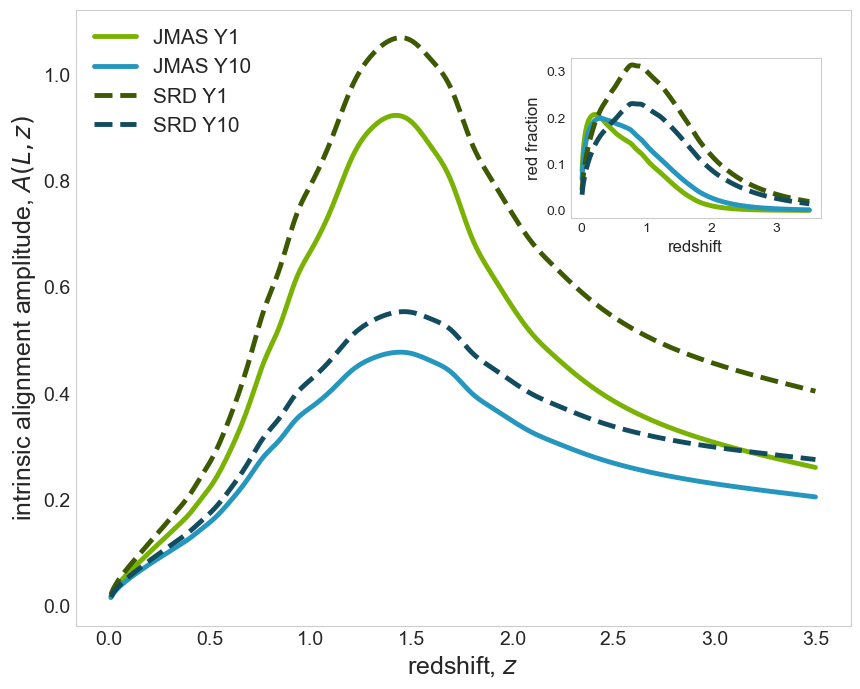

In [4]:
# Define plot settings for the main plot
main_plot_settings = [
    {"key": "jmas_y1", "color": jmas_colors["jmas_y1"], "label": "JMAS Y1", "linestyle": "-"},
    {"key": "jmas_y10", "color": jmas_colors["jmas_y10"], "label": "JMAS Y10", "linestyle": "-"},
    {"key": "srd_y1", "color": jmas_colors["srd_y1"], "label": "SRD Y1", "linestyle": "--"},
    {"key": "srd_y10", "color": jmas_colors["srd_y10"], "label": "SRD Y10", "linestyle": "--"}
]

# Define plot settings for the inset plot
inset_plot_settings = [
    {"key": "jmas_y1", "color": jmas_colors["jmas_y1"], "linestyle": "-"},
    {"key": "jmas_y10", "color": jmas_colors["jmas_y10"], "linestyle": "-"},
    {"key": "srd_y1", "color": jmas_colors["srd_y1"], "linestyle": "--"},
    {"key": "srd_y10", "color": jmas_colors["srd_y10"], "linestyle": "--"}
]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot main data
for setting in main_plot_settings:
    ax.plot(redshift_range,
            ia_amplitudes[setting["key"]],
            c=setting["color"],
            label=setting["label"],
            ls=setting["linestyle"])

# Set main plot labels and legend
ax.set_xlabel("redshift, $z$", fontsize=18)
ax.set_ylabel("intrinsic alignment amplitude, $A (L, z)$", fontsize=18)
ax.legend(frameon=False, fontsize=15, loc=2)

# Ticks settings
ax.tick_params(direction='in', which='both', labelsize=14)
ax.tick_params(length=6, width=1.5)
ax.grid(False)

# Add inset by specifying [x, y, width, height] in figure fraction units
x_position, y_position, width, height = 0.62, 0.62, 0.25, 0.2
axins = fig.add_axes([x_position, y_position, width, height])
axins.grid(False)

# Plot inset data
for setting in inset_plot_settings:
    axins.plot(redshift_range, 
               red_fractions[setting["key"]],
               c=setting["color"],
               ls=setting["linestyle"])

# Set inset plot labels
axins.set_xlabel("redshift", fontsize=12)
axins.set_ylabel("red fraction", fontsize=12)
axins.tick_params(direction='in', which='both', labelsize=10)
axins.tick_params(length=4, width=1)

# Save the figure
fig_path = "plots_output/intrinsic_alignments/"
plt.savefig(f"{fig_path}jmas_srd_cosmic_shear_ia_amplitude_and_redfrac.pdf",
            bbox_inches="tight")
plt.savefig(f"{fig_path}jmas_srd_cosmic_shear_ia_amplitude_and_redfrac.png",
            bbox_inches="tight", dpi=300)
